In [3]:
#Import Statements

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
#display matplotlib graphs in the notebook

In [6]:
import random
from pprint import pprint

#Load and prepare data
#The code doesn't take in 0.1 to represent the 10% of the data, it takes in numbers

In [7]:
df=pd.read_csv("Final.csv")
df= df.rename(columns={"reslt":"label"})
df

,community,age,weight,history,Hb,IFA,BP,res,label
0,1,26,37,1,5.9,1,1.444444,1,0
1,1,21,42,1,9.2,1,1.375000,1,0
2,1,21,36,1,8.8,1,1.500000,1,0
3,1,21,36,1,9.2,1,2.125000,1,0
4,1,21,36,1,8.0,1,1.375000,1,0
...,...,...,...,...,...,...,...,...,...
96,3,21,55,1,9.0,0,1.375000,1,1
97,3,24,39,6,8.4,0,1.500000,1,1
98,3,24,50,1,9.1,0,1.375000,1,1
99,1,24,38,1,9.1,0,1.696758,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
community    101 non-null int64
age          101 non-null int64
weight       101 non-null int64
history      101 non-null int64
Hb           101 non-null float64
IFA          101 non-null int64
BP           101 non-null float64
res          101 non-null int64
label        101 non-null int64
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


In [9]:
#Train-Test-Split to split data into test and train data

In [10]:
def train_test_data_split(df, test_size=24):
    rows= df.index.tolist() #index each data row in data set
    population=rows #population is number of indices
    split_size=test_size #the number of samples you want as your test size, as the split number
    indices_for_test=random.sample(population,split_size)#indices sampled for the test
    test_data=df.loc[indices_for_test]#test dataset
    train_data=df.drop(indices_for_test)#dataset for training
    return train_data,test_data

In [11]:
len(df)

101

In [12]:
train_df, test_df = train_test_data_split(df, test_size=24)

In [13]:
len(test_df)

24

In [14]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
48,1,21,40,1,9.2,1,1.571000,1,1
18,1,25,45,6,9.0,0,1.736946,1,0
72,1,21,43,1,10.2,1,1.571429,1,1
88,3,21,43,1,9.0,1,1.375000,1,1
84,3,24,60,1,9.2,1,1.714286,1,1


In [15]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
48,1,21,40,1,9.2,1,1.571000,1,1
18,1,25,45,6,9.0,0,1.736946,1,0
72,1,21,43,1,10.2,1,1.571429,1,1
88,3,21,43,1,9.0,1,1.375000,1,1
84,3,24,60,1,9.2,1,1.714286,1,1


In [16]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
48,1,21,40,1,9.2,1,1.571000,1,1
18,1,25,45,6,9.0,0,1.736946,1,0
72,1,21,43,1,10.2,1,1.571429,1,1
88,3,21,43,1,9.0,1,1.375000,1,1
84,3,24,60,1,9.2,1,1.714286,1,1


In [17]:
len(train_df.values)

77

In [18]:
train_df.values[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
### Data Pure -check

In [20]:
def check_data_purity(data):
    if len(np.unique(data[:, -1]))!=1:#if label column has more than 1 value
        return False
    else:
        return True    
    

In [21]:
data=train_df.values
check_data_purity(data)

False

In [22]:
###Classify

In [23]:
def classify_data(data):
    labels=data[:, -1]#retreive label column data
    unique,count=np.unique(labels, return_counts=True)#set of unique label values and the number of it
    #maximum label value
    classification=unique[count.argmax()]
    return classification

In [24]:
### Potential Splits

In [25]:
def getting_potential_splits(data):
    potential_splits={}#empty dict
    data.shape
    _, n_columns = data.shape
    for i in range(n_columns-1):#i is the column index
        potential_splits[i]=[]#empty list, list in dictionary, as listed below
        values=data[:, i]
        unique_values=np.unique(values)
        n=len(unique_values)
        for j in range(n-1):
            if j!=n-1:#avoids the first, so can access previous
                current_unique=unique_values[j]
                next_unique=unique_values[j+1]
                potential_split= (current_unique+next_unique)/2 #average between 2 unique values
                potential_splits[i].append(potential_split)
    return potential_splits

In [26]:
#data=train_df.values
potential_splits=getting_potential_splits(train_df.values)

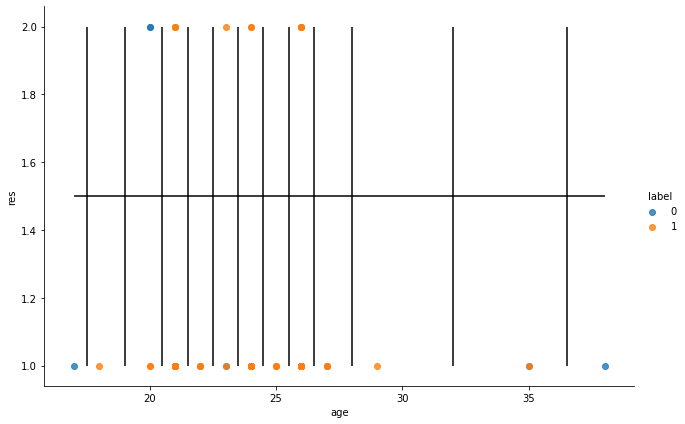

In [27]:
sns.lmplot(data=train_df,x="age",y="res",hue="label", fit_reg=False, height=6, aspect=1.5)
#plt.vlines(x=potential_splits[1], ymin=30, ymax=65)
#plt.hlines(y=potential_splits[7], xmin=17, xmax=38)
plt.hlines(y=potential_splits[7], xmin=17, xmax=38)#draw lines between data points
plt.vlines(x=potential_splits[1], ymin=1, ymax=2)



In [28]:
### Split Data

In [29]:
def split_data(data, split_column, split_value):
    split_column_values=data[:,split_column]# values of teh column whose values you want to split by
    data_below=data[split_column_values<=split_value]#split values of that column by the value you want to split by
    data_above=data[split_column_values>split_value]
    return data_below, data_above

In [30]:
data=train_df.values

In [31]:
data

array([[ 1.        , 26.        , 37.        ,  1.        ,  5.9       ,
         1.        ,  1.44444444,  1.        ,  0.        ],
       [ 1.        , 21.        , 42.        ,  1.        ,  9.2       ,
         1.        ,  1.375     ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  8.8       ,
         1.        ,  1.5       ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  9.2       ,
         1.        ,  2.125     ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  8.        ,
         1.        ,  1.375     ,  1.        ,  0.        ],
       [ 1.        , 26.        , 35.        ,  1.        ,  9.2       ,
         1.        ,  1.57142857,  1.        ,  0.        ],
       [ 4.        , 26.        , 31.        ,  1.        ,  9.        ,
         1.        ,  1.625     ,  1.        ,  0.        ],
       [ 1.        , 22.        , 30.        ,  1.        ,  9

In [32]:
split_column=2
split_value=37.5

In [33]:
data_below, data_above=split_data(data, split_column, split_value)

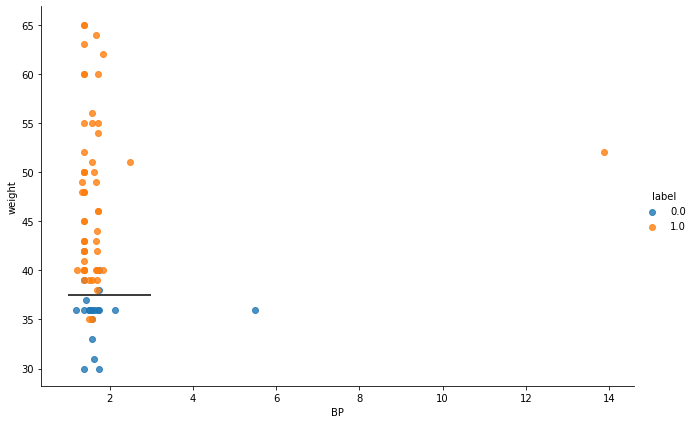

In [34]:
plotting_df=pd.DataFrame(data, columns=df.columns)#datra and columns
sns.lmplot(data=plotting_df, x="BP",y="weight",hue="label", fit_reg=False, height=6, aspect=1.5)
plt.hlines(y=split_value, xmin=1, xmax=3)

In [35]:
### Highest Information Gain

In [36]:

def calculate_entropy(data):
    labels=data[:,-1]
    _, counts=np.unique(labels, return_counts=True)#counts is a list
    probabilities=counts/counts.sum()# probability based on number of classes for the list
    entropy=sum(probabilities*(-np.log2(probabilities)))# H =sum(pilogpi)
    return entropy

In [37]:
calculate_entropy(data)

0.8453509366224364

In [38]:
def calculate_overall_entropy(data_below, data_above):
    n=len(data_below)+len(data_above)
    probability_data_below=len(data_below)/n
    probability_data_above=len(data_above)/n
    overall_entropy=(probability_data_below*calculate_entropy(data_below)+probability_data_above*calculate_entropy(data_above))
    #databelow(sum(plogp))+dataabove(sum(plogp))  
    return overall_entropy

In [39]:
calculate_overall_entropy(data_below,data_above)

0.3925029487629122

In [40]:
def get_best_split(data, potential_splits):
    overall_entropy=9999 #arbitrary large number
    for column_index in potential_splits: #the previously dict
        for value in potential_splits[column_index]:#list in dict
            split_column=column_index
            split_value=value
            data_below, data_above=split_data(data, split_column,split_value)
            current_overall_entropy=calculate_overall_entropy(data_below, data_above)
            if current_overall_entropy<= overall_entropy:
                overall_entropy=current_overall_entropy #want least entropy for highest information gain
                best_split_column=column_index #want to know which column to split at
                best_split_value=value #which value you should split at for that column
    return best_split_column, best_split_value

In [41]:
potential_splits=getting_potential_splits(data)


In [42]:
data=train_df.values
get_best_split(data, potential_splits)

            

(2, 38.5)

In [43]:
### Decision Tree Algorithm

In [44]:
#sub_tree={question:[yes_answer,no_answer]}

In [45]:
{"weight<=37.5":[0,1]}

{'weight<=37.5': [0, 1]}

In [46]:
### Algorithm

In [47]:
def decision_tree_algorithm(df, counter=0, min_samples=1, max_depth=7):
    
    #data preparations
    if counter==0:
        global COLUMN_HEADERS #global to access
        COLUMN_HEADERS=df.columns
        data=df.values #numpy array if first iteration
    else:
        data=df #later iterations
    
    #base case
    if (check_data_purity(data)) or (counter==max_depth) or (len(data)<min_samples) :
        classification=classify_data(data) #direct classification
        return classification
    
    #recursive part
    else:
        counter+=1
        #impure data
        #helper functions
        potential_splits=getting_potential_splits(data)
        split_column, split_value=get_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        #instantiate subtree
        feature_name=COLUMN_HEADERS[split_column]# get the name of the column, not just ind value
        question="{} <= {}".format(feature_name, split_value)
        sub_tree={question:[]}#answer could be a list
        
        #find answers
        yes_answer=decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer=decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        if yes_answer==no_answer:#if greater than a max depth, the yes and no answers tend to be the same
            sub_tree= yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
    return sub_tree

In [71]:
#pruning
tree=decision_tree_algorithm(train_df, max_depth=6)#can give shorter trees and more accuracy
pprint(tree)

{'weight <= 38.5': [{'BP <= 1.7055219140000002': [{'Hb <= 9.25': [{'Hb <= 8.850000000000001': [0.0,
                                                                                               {'BP <= 1.5712142855': [1.0,
                                                                                                                       {'BP <= 1.679148288': [0.0,
                                                                                                                                              1.0]}]}]},
                                                                  0.0]},
                                                  0.0]},
                    {'BP <= 1.7256160915': [{'age <= 23.5': [{'weight <= 42.5': [{'BP <= 1.4729999999999999': [0.0,
                                                                                                               1.0]},
                                                                                 1.0]},
                        

In [53]:
df.columns

Index(['community', 'age', 'weight', 'history', 'Hb', 'IFA', 'BP', 'res',
       'label'],
      dtype='object')

In [54]:
### Classification


In [55]:
example=test_df.iloc[2]#2nd index row
example

community     1.000000
age          21.000000
weight       43.000000
history       1.000000
Hb           10.200000
IFA           1.000000
BP            1.571429
res           1.000000
label         1.000000
Name: 72, dtype: float64

In [56]:
def classify_example(example, tree):
    question=list(tree.keys())[0] #the first question
    feature_name, comparison_operator, value=question.split()#all 3 stored separately

    #ask question
    if example[feature_name]<=float(value):#"weight<=38.5 similar"
        answer=tree[question][0]#yes
    else:
        answer=tree[question][1]#no

    #base case
    if not isinstance(answer, dict): #if answer is single 
        return answer
    #recursive call of function
    else:
        residual_tree=answer #if answer is a list, another condition
        return classify_example(example, residual_tree)
    

In [57]:
classify_example(example, tree)

1.0

In [58]:
example["weight"]<=37.5

False

In [59]:
### Accuracy

In [65]:
def calculate_accuracy(df, tree):
    df["classification"]=df.apply(classify_example, axis=1, args=(tree,))#create new column in df to compare easily
    df["classification_correct"]=df.classification==df.label#true if classified correctly
    
    accuracy=df.classification_correct.mean()*100 #accuracy percentage 
    return accuracy

In [66]:
calculate_accuracy(test_df, tree)

79.16666666666666

In [62]:
#test_df.loc[6]

In [67]:
random.seed(2)
train_df, test_df =train_test_data_split(df, test_size=24)
tree=decision_tree_algorithm(train_df,max_depth=3)
accuracy=calculate_accuracy(test_df,tree)

pprint(tree)
print(accuracy)

{'weight <= 38.5': [0.0,
                    {'BP <= 1.7256160915': [1.0,
                                            {'BP <= 1.785139901': [0.0,
                                                                   1.0]}]}]}
100.0


In [68]:
#df
#random.seed(0)

In [69]:
test_df

,community,age,weight,history,Hb,IFA,BP,res,label,classification,classification_correct
7,4,26,31,1,9.0,1,1.625000,1,0,0.0,True
11,3,35,36,1,9.9,1,1.571429,1,0,0.0,True
10,4,17,30,1,9.0,0,1.375000,1,0,0.0,True
46,1,21,39,1,8.9,1,1.571000,1,1,1.0,True
21,1,24,36,1,9.6,0,1.200000,1,0,0.0,True
94,1,24,40,1,9.1,0,1.696758,1,1,1.0,True
85,4,21,48,1,9.2,1,1.375000,1,1,1.0,True
39,4,24,48,1,9.6,1,1.333000,2,1,1.0,True
32,1,28,60,1,9.0,1,1.375000,1,1,1.0,True
77,1,23,60,1,10.0,1,1.375000,2,1,1.0,True


In [62]:
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=24)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

88.30083333333336

In [63]:
random.seed(3)
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=24)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

88.36208333333322

In [217]:
random.seed(4)
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=24)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

88.27458333333351

In [165]:
random.seed(5)
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=11)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

90.02090909091162

In [166]:
random.seed(6)
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=10)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

90.101

In [167]:
random.seed(6)
summation=0
for i in range(1,10000,1):
    train_df, test_df =train_test_data_split(df, test_size=10)
    tree=decision_tree_algorithm(train_df,max_depth=3)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10000
    #pprint(tree)
    #print(accuracy)
total

90.101

In [248]:
0.1*106


10.600000000000001

In [329]:
random.seed(7)
summation=0
s_time=0
for i in range(1,101,1):
    train_df, test_df =train_test_data_split(df, test_size=10)
    start=time.time()
    tree=decision_tree_algorithm(train_df,max_depth=3)
    end=time.time()
    s_time=s_time+(end-start)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10
    #pprint(tree)
    #print(accuracy)
total


88.8

In [330]:
s_time

5.218558073043823

In [92]:
random.seed(8)
summation=0
s_time=0
for i in range(1,10001,1):
    train_df, test_df =train_test_data_split(df, test_size=10)
    start=time.time()
    tree=decision_tree_algorithm(train_df,max_depth=3)
    end=time.time()
    s_time=s_time+(end-start)
    accuracy=calculate_accuracy(test_df,tree)
    summation=summation+accuracy
total=summation/10001
    #pprint(tree)
    #print(accuracy)
total
s_time

515.645646572113

In [94]:
s_time

515.645646572113

In [93]:
total

89.7950204979502